<font size=6>**Insurance Claims- Fraud Detection**

<font size=5>**Problem Statement:**<br>
    
<font size=4>**Business case:**<br>
<font size=3>Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

     

<font size=5>**Importing all the necessary libraries**

In [4]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Checking the first 5 and last 5 rows of our entire dataset. We can see that the total number of rows are 1000 and columns are 40 in our dataframe. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model.In our problem statement we are asked to predict the fraud_reported as our label using the remaining columns as our features making this to be a **Classification problem!**

<font size=6>**Exploratory Data Analysis**

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Checking out all the column details that were truncated before and analyzing if we can drop any useless information column(s)

In [6]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


Using the nunique method we are able to list down all the unique values present in our dataset columns. I do not see any column with one single unique value either so that is good. However there are 2 columns which have all the 1000 rows filled with unique data that will need to be removed as it won't help in our label prediction anyway.

In [7]:
df.drop(["policy_number", "incident_location"], axis=1, inplace=True)

I am dropping the "policy_number" and "incident_location" columns since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.

In [8]:
df.isna().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

The isna method along with the sum function gives us the details on the missing values. In the above cell we can see that the column "c39" is only filled null values and can be dropped.

In [9]:
df.drop("_c39", axis=1, inplace=True)

Removed the "c39" column that was only filled with null values.

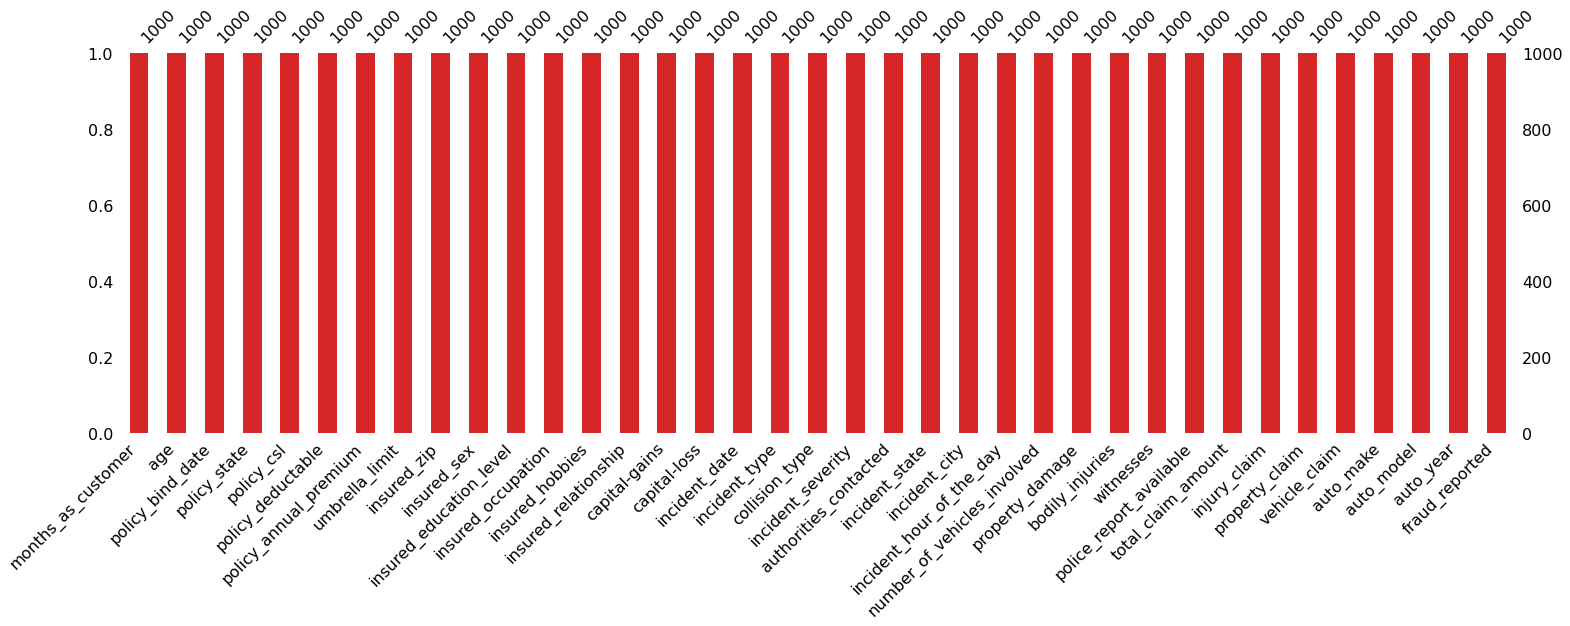

In [15]:
missingno.bar(df, figsize = (25,7), color="tab:red")
plt.show()

Awesome it looks like none of our dataset column have any null values in them. Each any every column has all their 1000 rows filled with some or the other information.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

Using the info method we can see that there is 1 column with float data type, 16 columns with integer data type and 20 columns that have object data type. We will try to spearate these columns into numeric and object datatypes for easier analysis.

 **getting list of all object data type column names**

In [17]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n ",object_datatype)

# getting the list of all numeric data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n ",number_datatype)

Object Data Type Columns are:
  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


We have successfully bifurcated the object datatype column names and numeric data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process data only on numerical continous columns.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


Using the describe method to check the numerical data details. There are 17 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all mostly properly distributed in terms of data points but I do see some abnormality that we will confirm with a visual on it.

**visualizing the statistical description of numeric datatype columns**

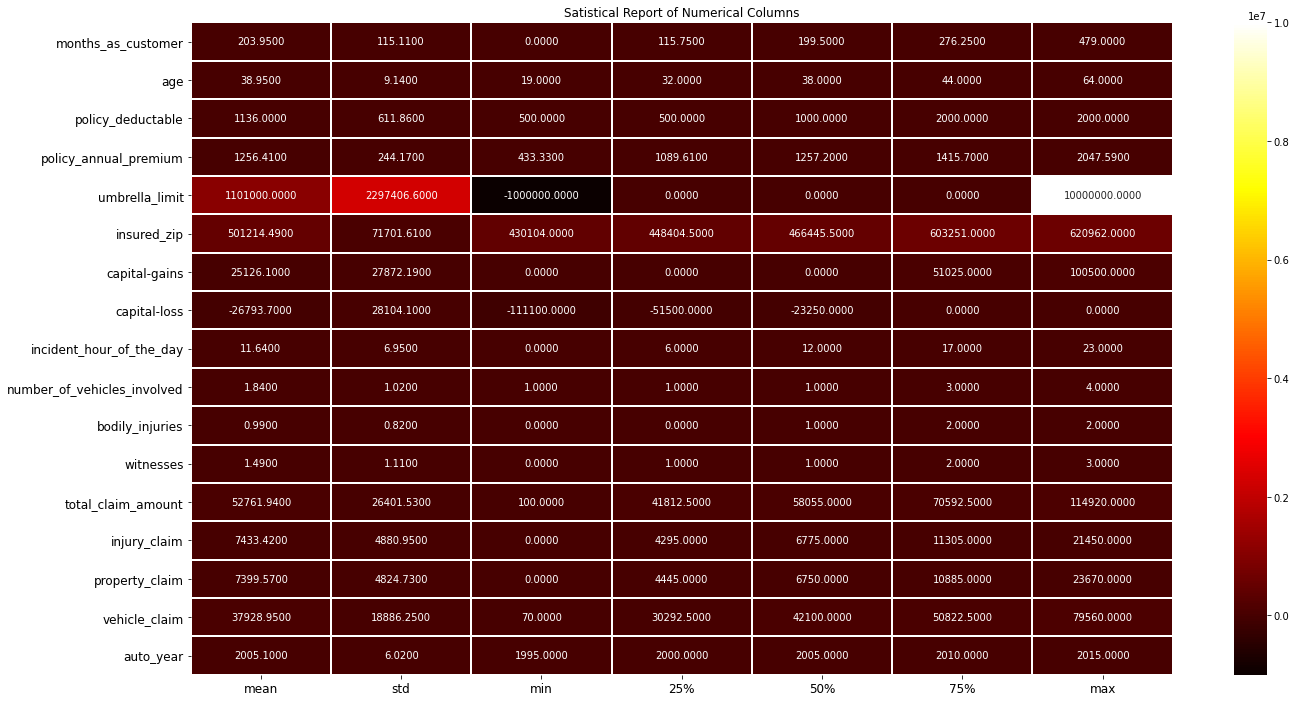

In [21]:
plt.figure(figsize = (22,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="hot")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

So the column that stands out the most in terms of values that are present in the column is umbrella_limit. We can see that this particular column has numeric data higher than all the remaining columns present in our entire dataset.

In [23]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_bind_date,1000,951,28-04-1992,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the describe method along with it's parameter all to include each and every column present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple data.

In this dataset we have the details of an automobile insurance policy along with the customer details. It also has the details of the accident on the basis of which the insurance claims have been made.

**Feature columns:**<br>
**1)Company's data for insurance claim policy** : months_as_customer, age, policy_number(dropped), policy_bind_date, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit<br>

**2)Personal details of the customers** : insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital- gains, capital-loss.<br>

**3)Details of the incident**: incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location(dropped), incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_amount_claimed, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year<br>

**Target label:**<br>
**fraud_reported** : Y-YES / N-NO<br>

Above cell confirms that right now all the columns have all the rows filled with some or the other data reflecting in the count column.

In [24]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("-"*60)

policy_bind_date
28-04-1992    3
01-01-2006    3
05-08-1992    3
25-05-1990    2
20-09-1990    2
04-06-2000    2
28-12-2002    2
14-04-1992    2
07-04-1999    2
05-01-1992    2
21-12-2002    2
05-07-2014    2
09-03-2003    2
03-01-2004    2
28-01-2010    2
07-12-1995    2
06-05-2007    2
11-11-1998    2
14-07-1997    2
20-07-1991    2
29-01-1998    2
16-05-2008    2
08-11-2009    2
16-07-2002    2
07-07-1996    2
07-12-1999    2
03-02-1997    2
15-11-1997    2
21-09-1996    2
19-09-1995    2
27-07-2014    2
09-07-2002    2
28-12-1991    2
21-09-2005    2
30-08-1993    2
09-08-2004    2
29-09-1999    2
14-12-1991    2
25-12-2013    2
04-05-2000    2
11-03-2010    2
22-08-1991    2
25-09-2001    2
15-05-1997    2
07-11-1997    2
24-06-1990    2
25-03-2007    1
27-06-1996    1
19-05-1990    1
29-07-1996    1
04-06-1996    1
29-02-1992    1
18-08-1990    1
20-11-1991    1
09-05-2009    1
10-09-2000    1
04-01-2003    1
28-03-1990    1
25-11-2006    1
08-03-1995    1
05-08-2006    1
01-10-2

Checking the number of rows covered by all the unique values present in our object data type columns. My observations from this are:

policy_bind_date has date related data
incident_date again has date related data
These two columns are marked as object data type but they hold date related information and will need to be handled accordingly.

Also we see rows that are filled with a "?" data in the below columns:

collision_type
property_damage
police_report_available
So we will need to name something meangingful to these values present in above 3 columns.

In [25]:
df[object_datatype].nunique().to_frame("Unique Values")

,Unique Values
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


Taking a look at all the unique value number for object datatype columns.

In [26]:
df[number_datatype].nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
capital-gains,338
capital-loss,354
incident_hour_of_the_day,24
number_of_vehicles_involved,4


Taking a look at all the unique value number for numeric datatype columns.

<font size=6>**Data Pre Processing**

<font size=3>**Separating the Date column into seperate day - month -  year columns using pandas Datetime method**

In [27]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

We have separated the date object datatype columns into 3 columns for day, month and year each.

**Dropping the original Date columns after separating the desired outputs**

In [28]:
df.drop(columns = ['policy_bind_date','incident_date'], axis=1, inplace=True)

In the above cell we have dropped the original date object datatype columns after we got our separate day, month and year values.

**Replacing the "?" filled rows with a meaningful name of "questionable"**

In [29]:
df['collision_type'] = df['collision_type'].replace('?', 'questionable')
df['property_damage'] = df['property_damage'].replace('?', 'questionable')
df['police_report_available'] = df['police_report_available'].replace('?', 'questionable')

I have used the term "questionable" to replace all the "?" filled rows with a proper categorical name so that the representation part would look sensible and encoding will be better too.

**cheking for any missing data and if yes then it's percentage**

In [30]:
for col in df:
    percentage = np.round((df[col].isnull().sum()/1000)*100, 2)
    print(col, ":".format(), percentage, '%')

months_as_customer : 0.0 %
age : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_hour_of_the_day : 0.0 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
policy_bind_Day : 0.0 %
policy_bind_Month : 0.0 %
policy_bind_Year : 0.0 %
incident_Day : 0.0 %
incident_Month : 0.0 %
incident_Year : 0.0 %


Great it looks like we have no missing value or null value present in any of our dataset columns.

In [31]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2
insured_education_level,7


After the addition of new columns I am taking a look at all the unique values for our columns once again and I see that column "incident_Year" has only 1 unique value filling the entire column and therefore can be dropped.

In [32]:
df.drop("incident_Year", axis=1, inplace=True)

I have removed the "incident_Year" column that had just a single value filling the entire column and would not have provided any useful insight in our label prediction model.

<font size=6>**Visualization**

Single digit category column name: fraud_reported


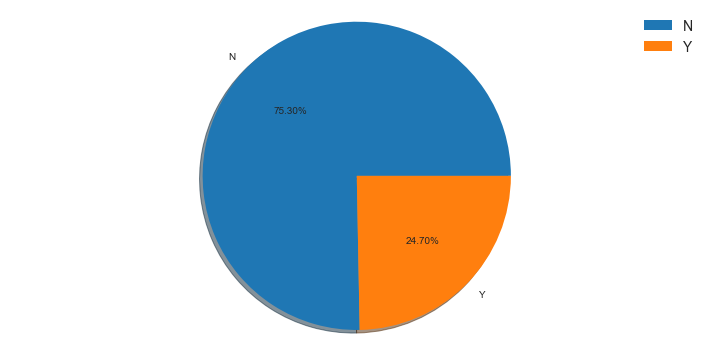

Single digit category column name: insured_sex


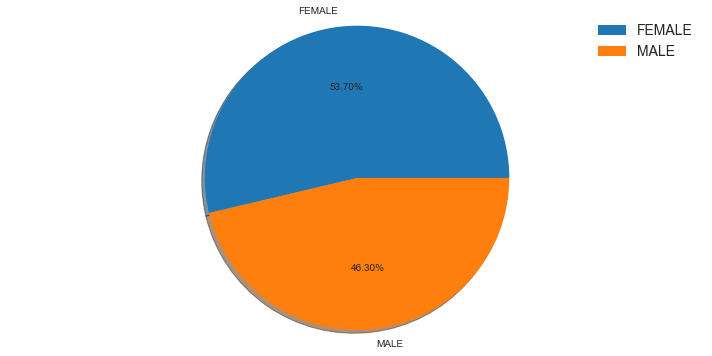

Single digit category column name: policy_state


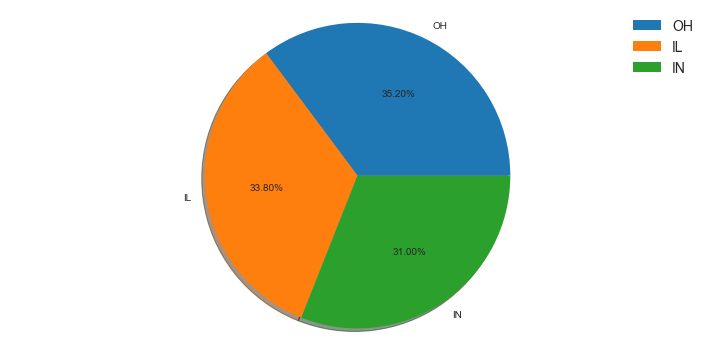

Single digit category column name: policy_csl


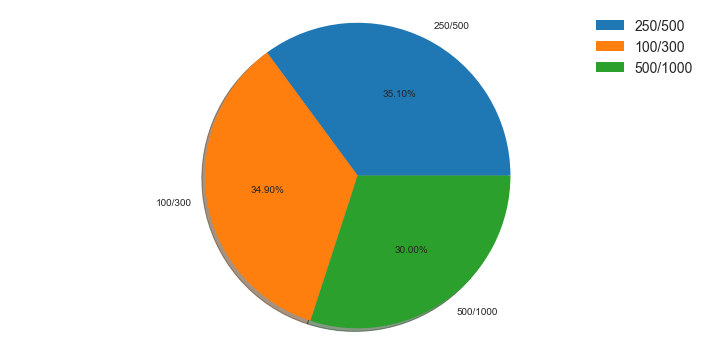

Single digit category column name: policy_deductable


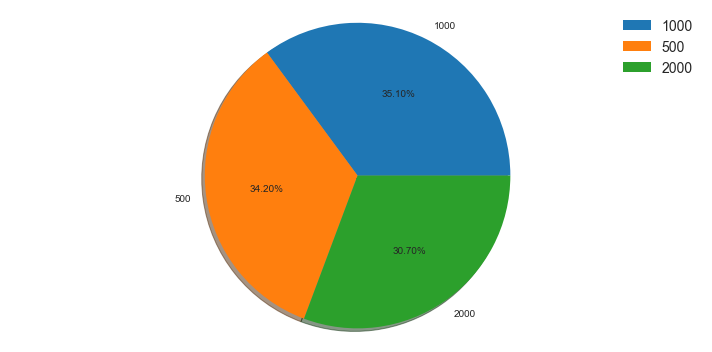

Single digit category column name: bodily_injuries


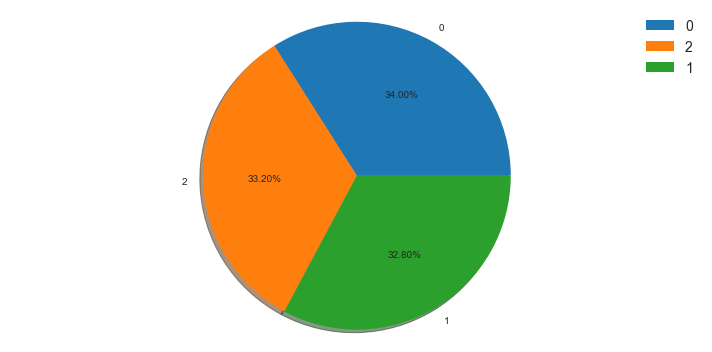

Single digit category column name: police_report_available


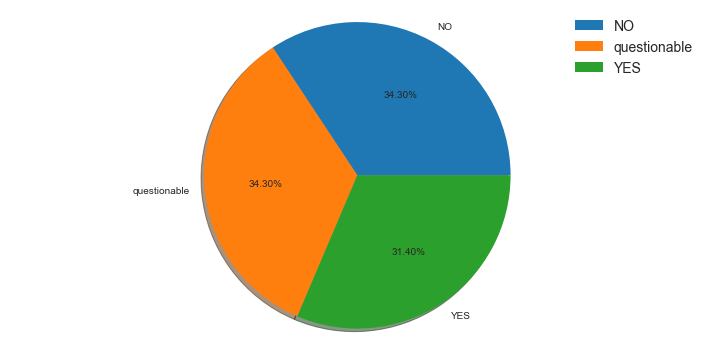

Single digit category column name: property_damage


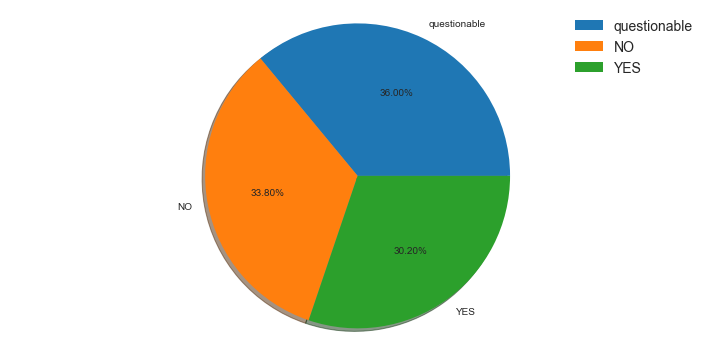

Single digit category column name: incident_type


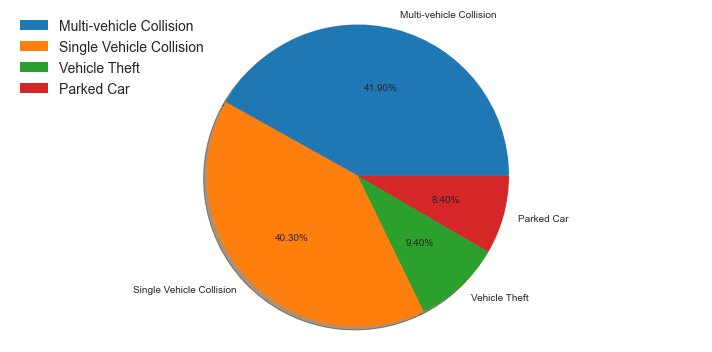

Single digit category column name: collision_type


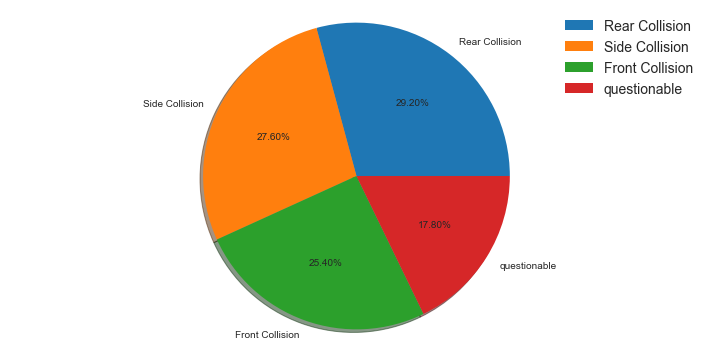

Single digit category column name: incident_severity


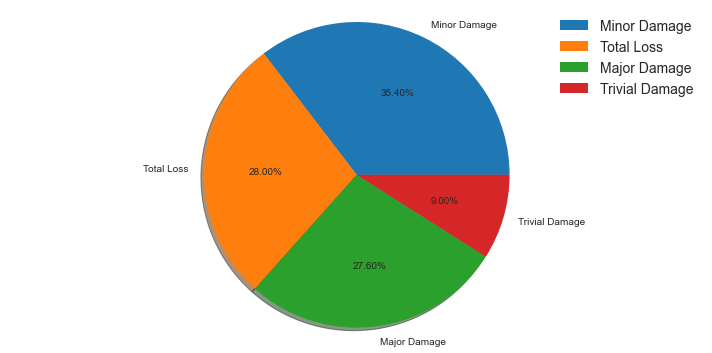

Single digit category column name: number_of_vehicles_involved


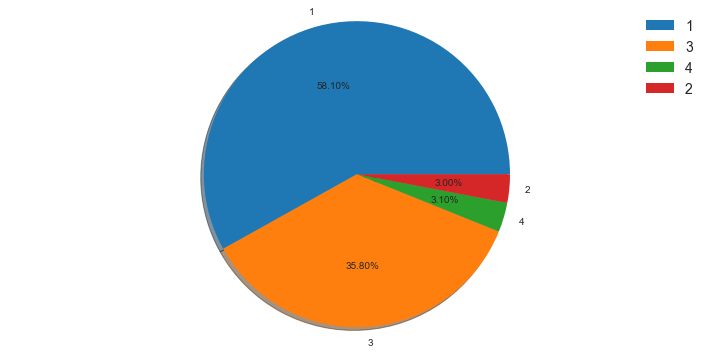

Single digit category column name: witnesses


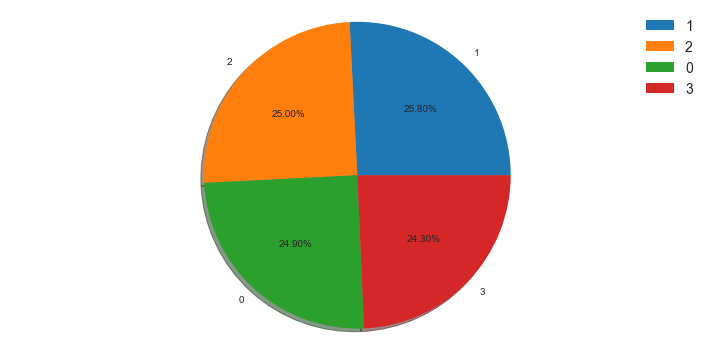

Single digit category column name: authorities_contacted


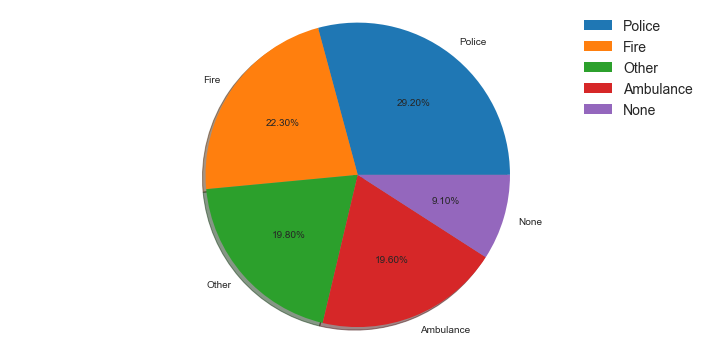

Single digit category column name: insured_relationship


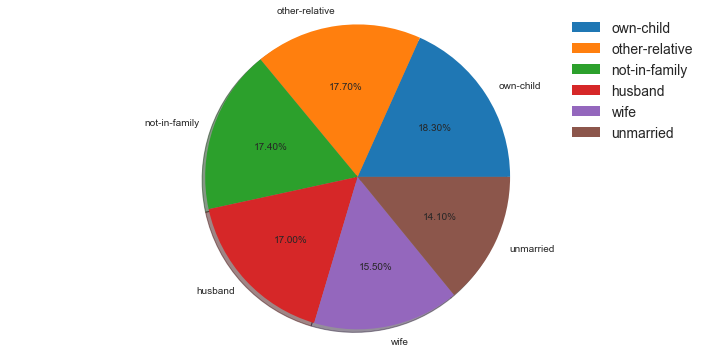

Single digit category column name: insured_education_level


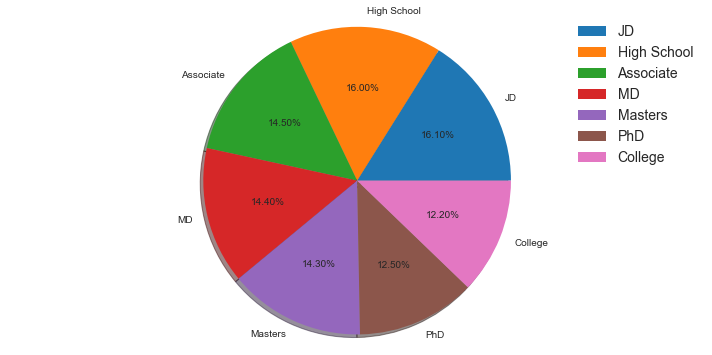

Single digit category column name: incident_state


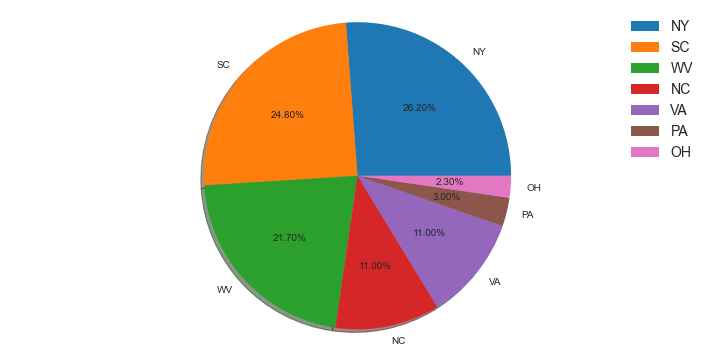

Single digit category column name: incident_city


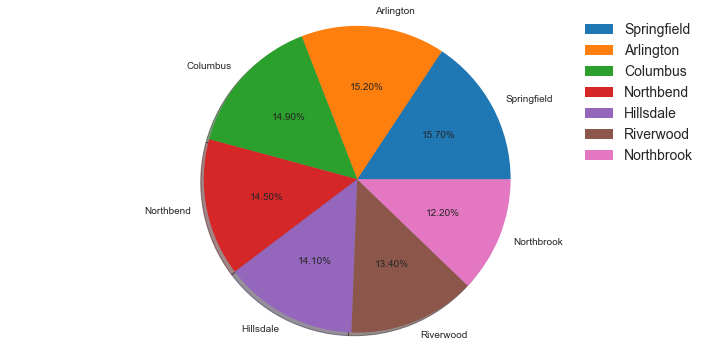

In [39]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

In the above pie plots we can see the categorical data distribution among the dataset rows covering a single set number of data points in each value.

My observations:<br>
 
1)We can see that less number of data cover the yes portion of fraud reported and since this is our target label it indicates towards the problem of class imbalance as well<br> 

2)We can see that almost both male and female have insurance but the data coverage for female is a bit higher than their male couterparts<br>

3)For policy state Ohio has a larger chunk of data as compared to Illinois and Indiana but all 3 have pretty much similar data points<br>

4)in the policy sections again we see that 250/500 category has a slighty higher data coverage than the 100-300 and 500/1000 categories<br>

5)With respect to policy deductable criteria we can see 1000 to be at a higher rate than it's 500 and 2000 data counterparts.<br>

6)In terms of bodily injueries the severity for level 0 is slightly higher than the level 2 and 1<br>

7)For police report availability only 31.40 percent people were able to produce genuine reports while the remaining 34.30 percent were either unable to show a report or the authenticity was questionable<br>

8)When checking for property damage data we see that 36 percent of the information is questionable while 33.80 percent people did not face any property damage so only 30.20 percent people suffered from property damage.<br>

9)When we check for accident type then single vehicle and multi vehicle collisions have covered more than 40 percent data each and then we have 9.40 percent incidents for vehicle theft and 8.40 percent incidents for parked car.<br>

10)For collision type categories we see 29.20 percent incident vehicles with rear collision which is like the highest and 17.80 percent of vehicle incidents are questionable.<br>

11)Measuring the incident severity the highest category covers for minor damages with 35.40 percent and lowest number in incident severity is of 9 percent that only has trivial damage data<br>

12)For number of vehicles being involved in an incident majorly lies for 1 and 3<br>

13)When we check for witnesses section then all the categories of witnesses are almost similarly distributed<br>

14)he data on whether an authority was contacted after an accident covers the police being notified the most then the fire brigade and ambulances but also has data on others being called and none being informed when it came to contacting people.<br>

15)Again for insured relationship column I see almost all the categorical value equally distributed and covering the data rows.<br>

16)Similar to insured relationship even insured education level column has it's data rows distributed equally amongst all the categorical values it holds.<br>

17)For the incident state column I see major portion of data rows are covered by New York, South Carolina and West Virginia states.<br>

18)While checking for incident related city all the cities that are listed in the column have an equal share of data coverage

Double digit category column name: umbrella_limit


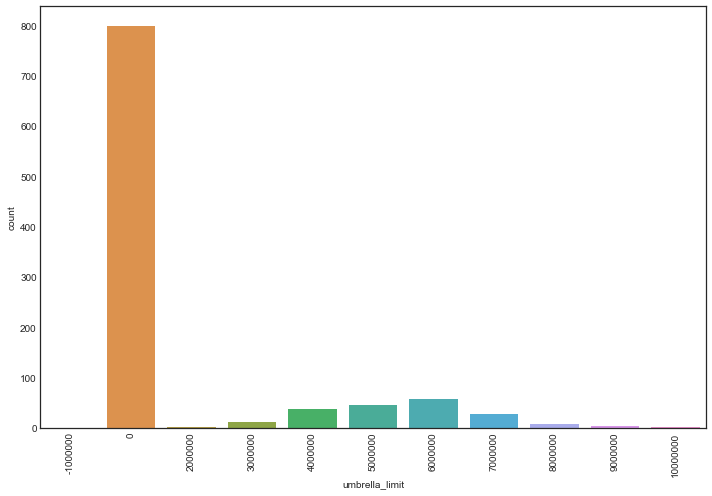

Double digit category column name: insured_occupation


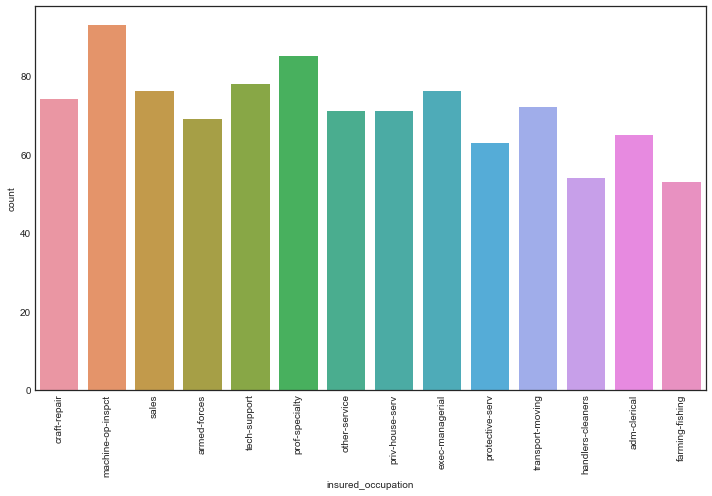

Double digit category column name: auto_make


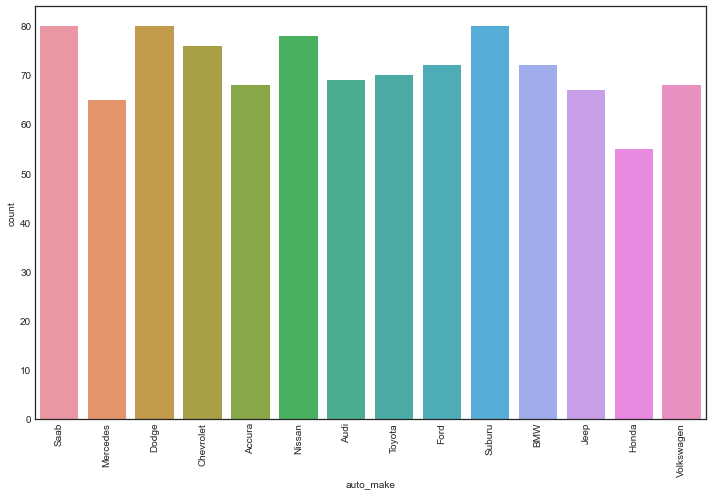

Double digit category column name: insured_hobbies


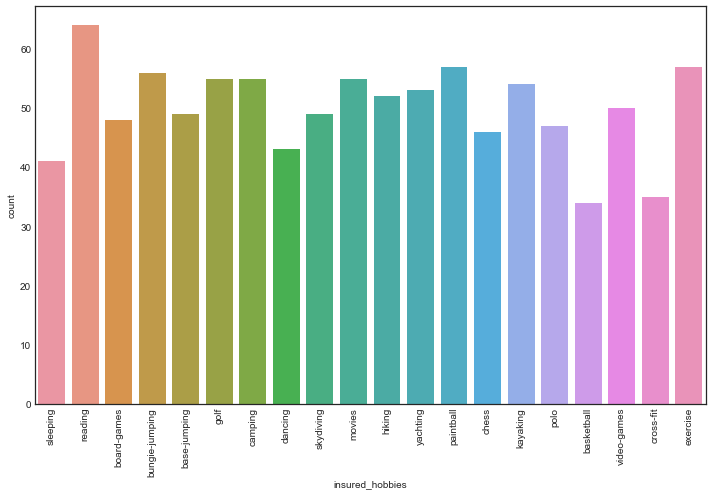

Double digit category column name: auto_model


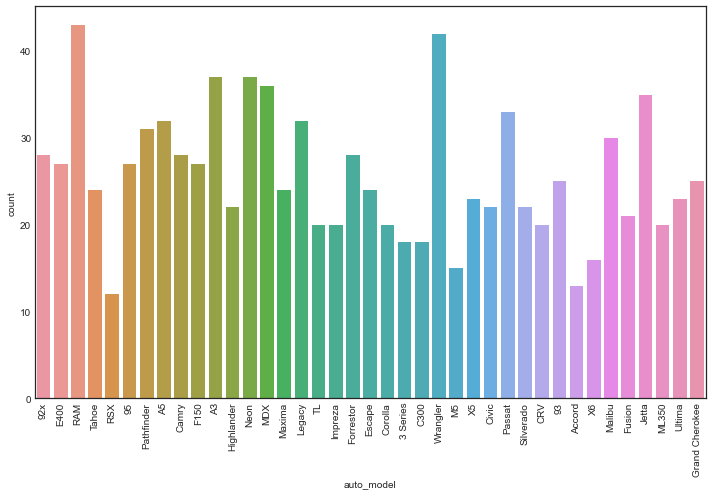

In [40]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(f"Double digit category column name:", j)
    generate_countplot(df[j])

In the above count plots we can see the categorical data distribution among the dataset rows covering double digit category in a set number of data points for each value.

My observations:

We see that the umbrella limit is the highest for the number 0 than any other value listed in that column<br>

With respect to occupation of all the insured people we see the highest data coverage by machine operation inspector and professional speciality designations<br>

Taking a look at vehicle companies we see a higher scale of data for saab, dodge, nissan, suburu and volkswagen<br>

The listeing of hobbies held by insured people has the highest data coverage on reading<br>

If we take a look at the vehicle models that were registered for incidents then we see lots of data rows covered by RAM and Wrangler automobile models

insured_sex vs fraud_reported column ->


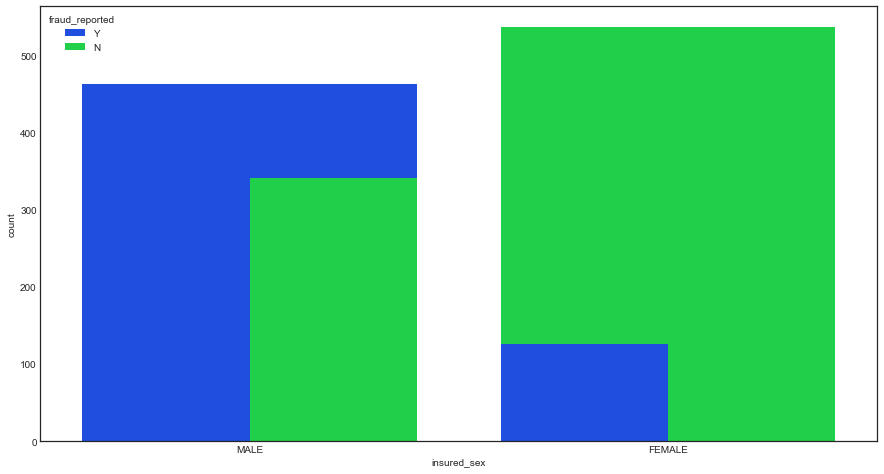

policy_state vs fraud_reported column ->


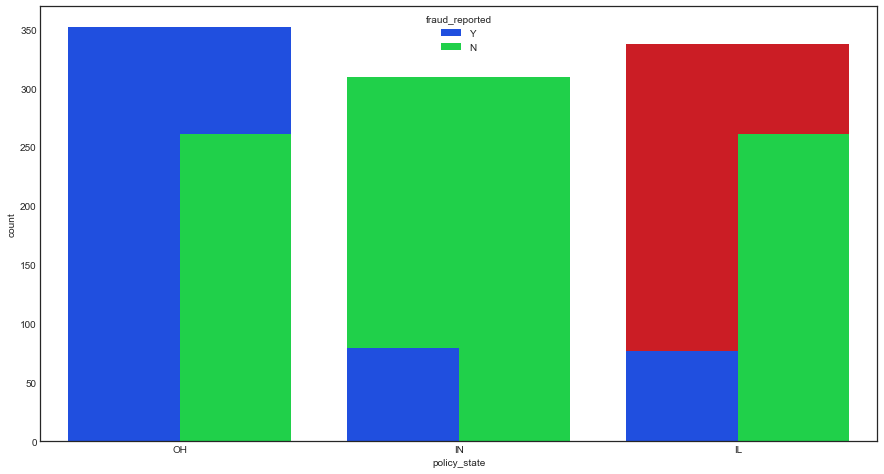

policy_csl vs fraud_reported column ->


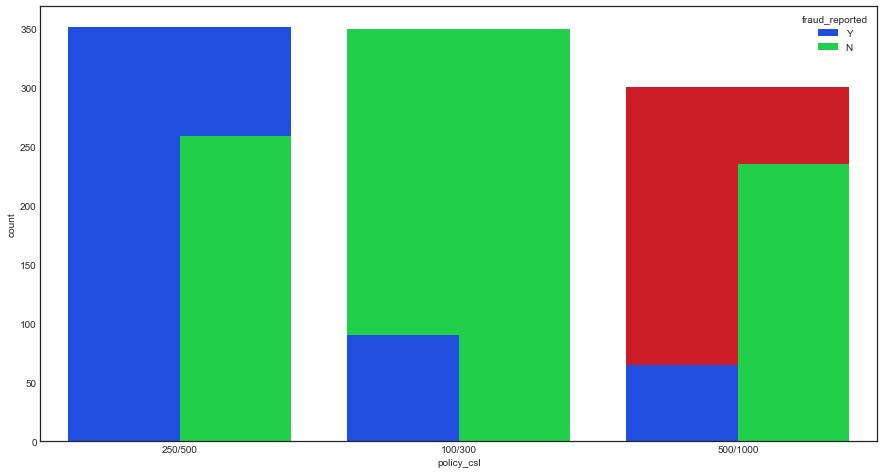

policy_deductable vs fraud_reported column ->


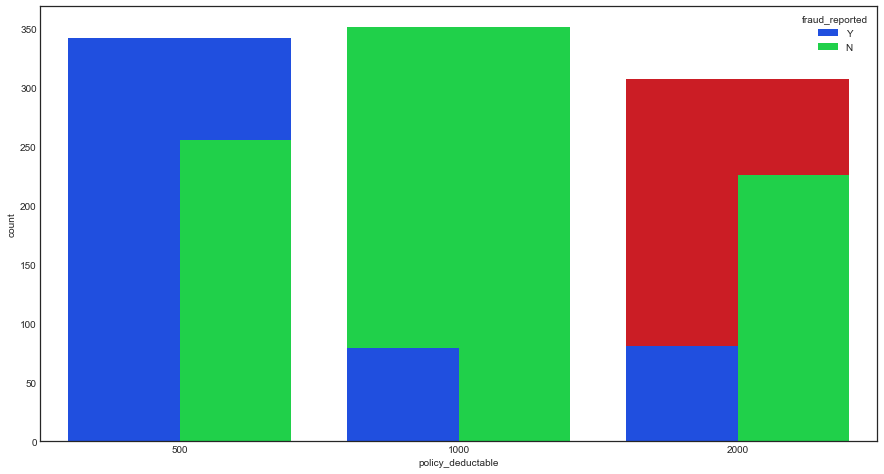

bodily_injuries vs fraud_reported column ->


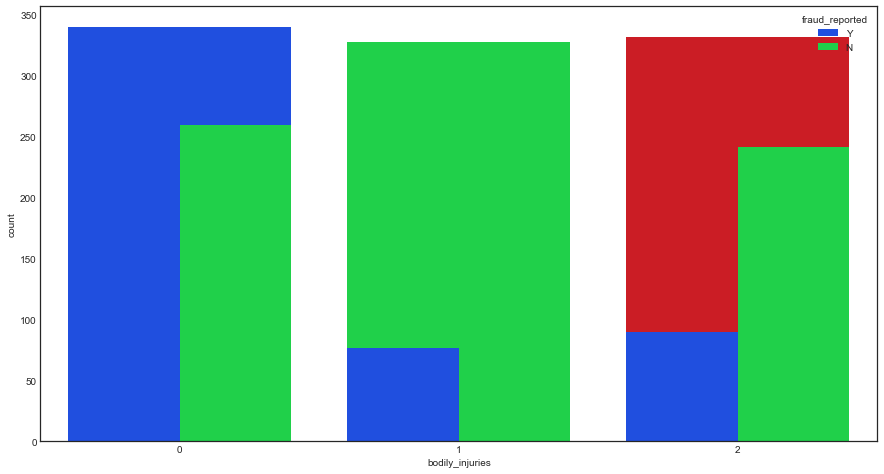

police_report_available vs fraud_reported column ->


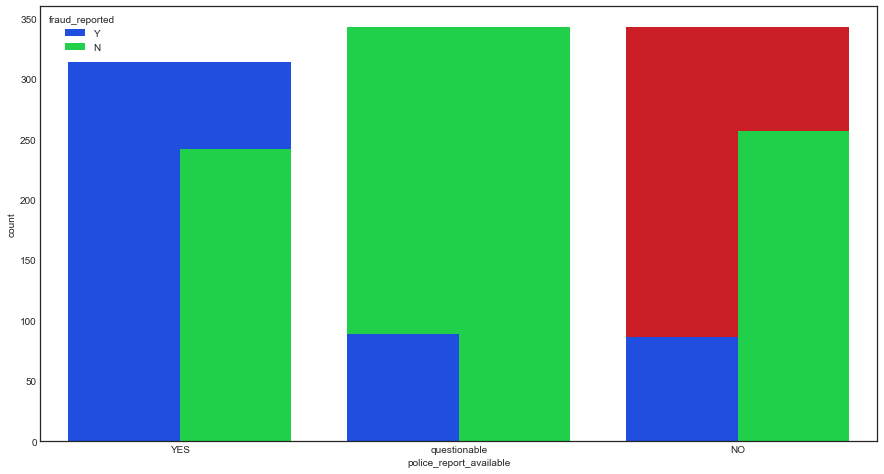

property_damage vs fraud_reported column ->


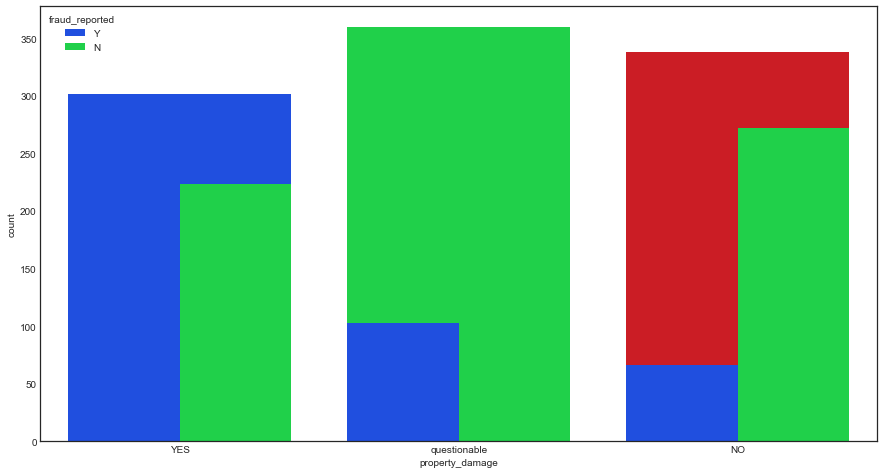

incident_type vs fraud_reported column ->


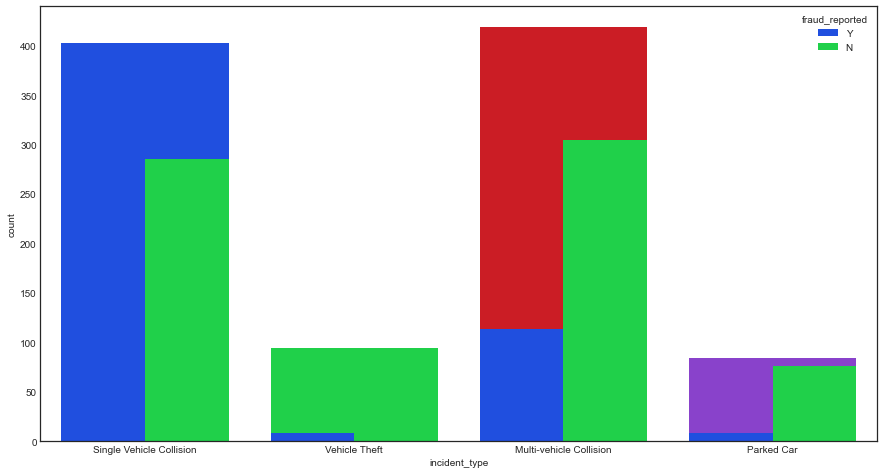

collision_type vs fraud_reported column ->


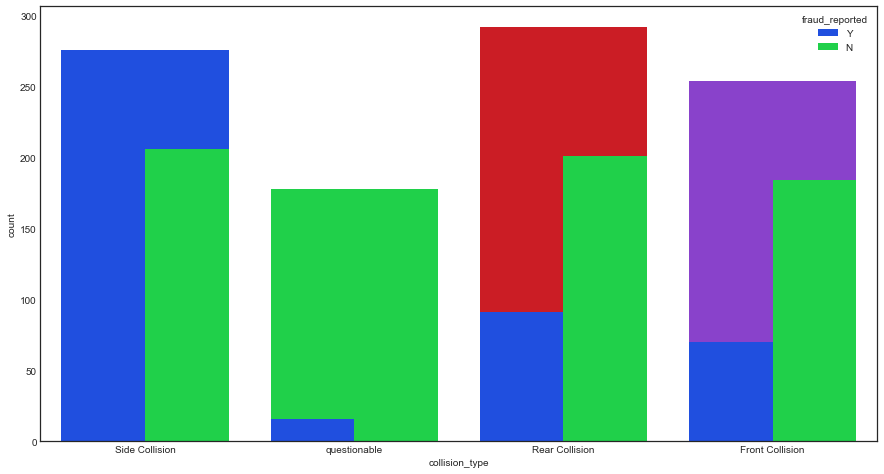

incident_severity vs fraud_reported column ->


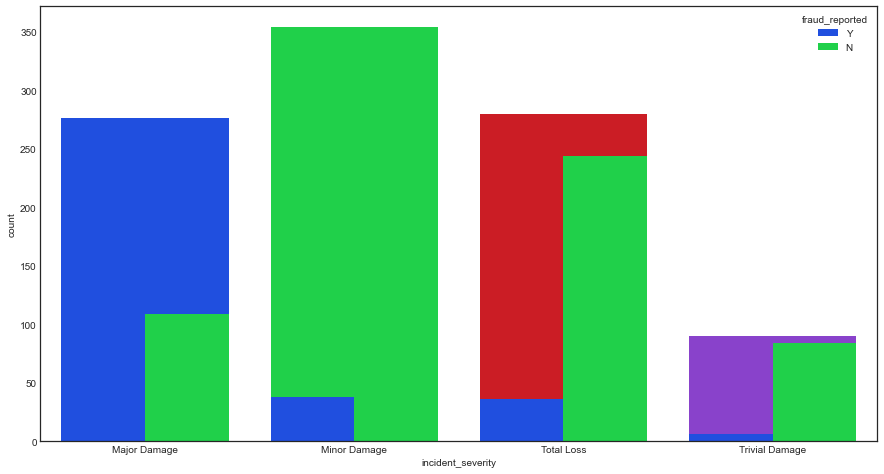

number_of_vehicles_involved vs fraud_reported column ->


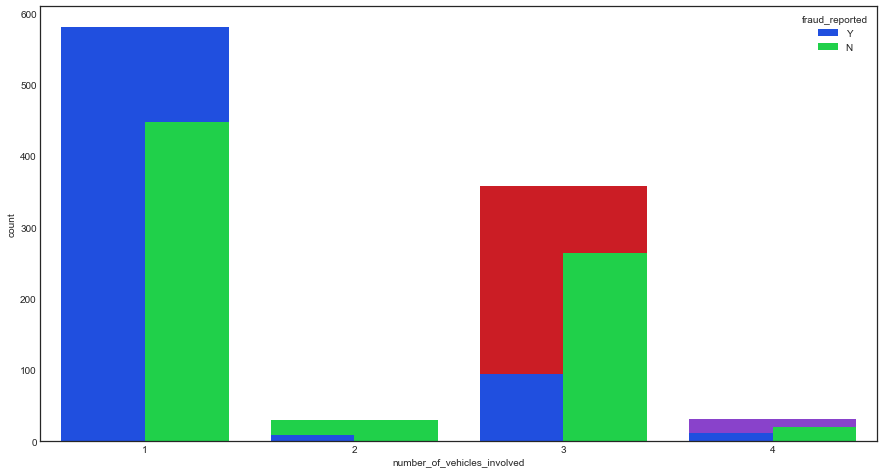

witnesses vs fraud_reported column ->


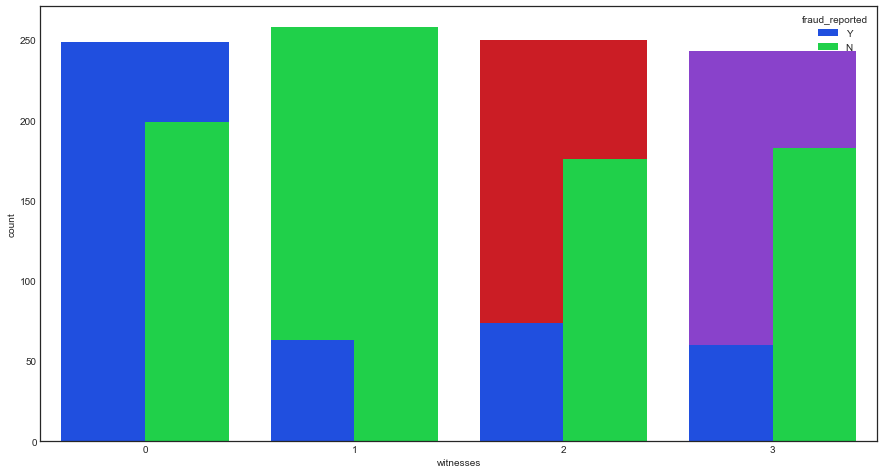

authorities_contacted vs fraud_reported column ->


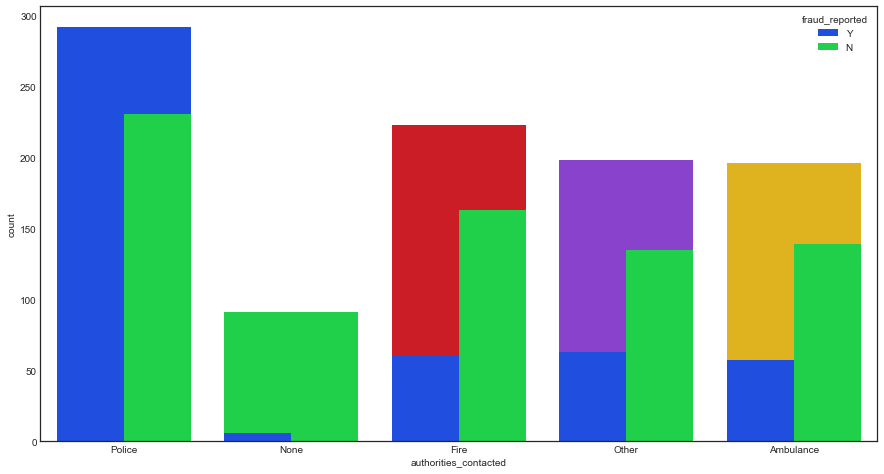

insured_relationship vs fraud_reported column ->


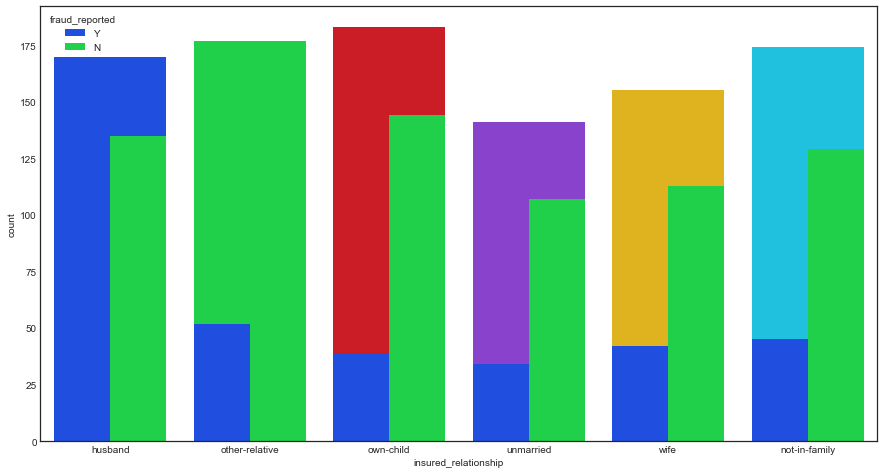

insured_education_level vs fraud_reported column ->


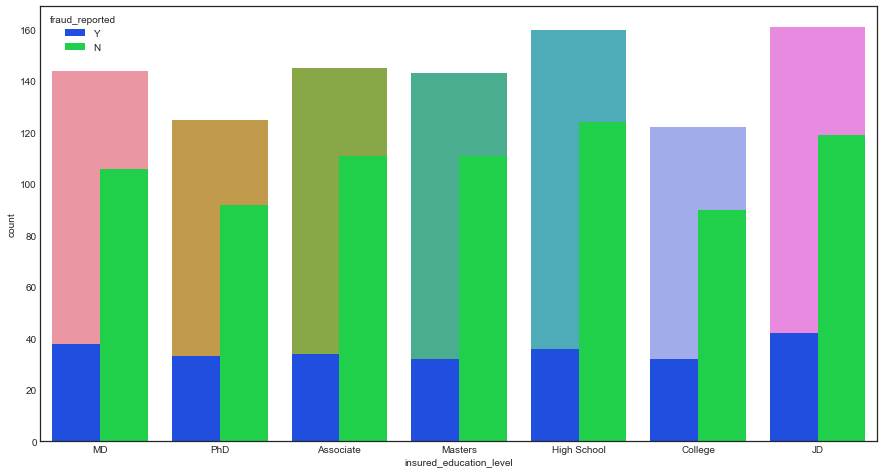

incident_state vs fraud_reported column ->


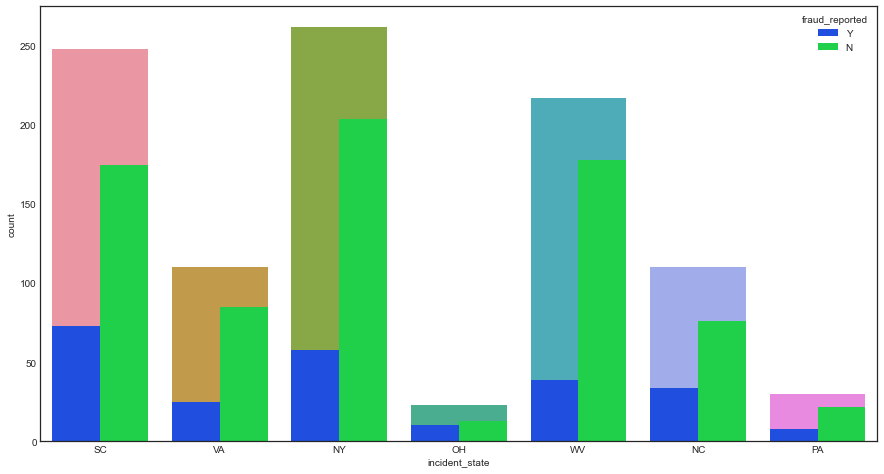

incident_city vs fraud_reported column ->


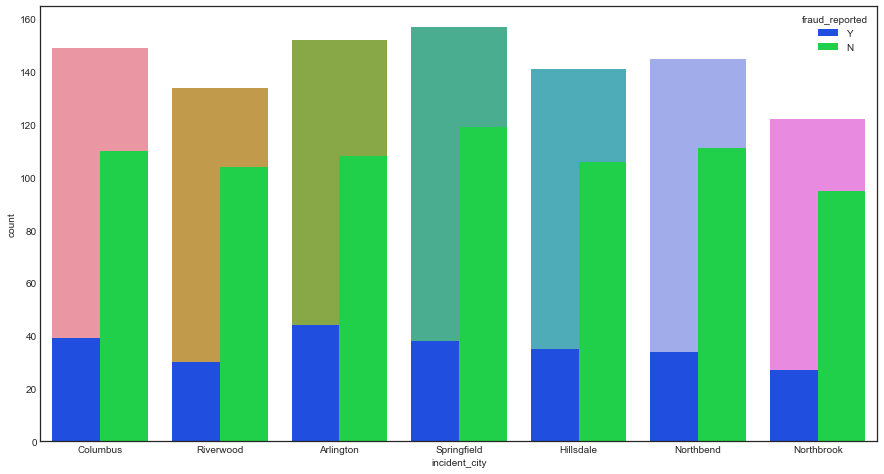

umbrella_limit vs fraud_reported column ->


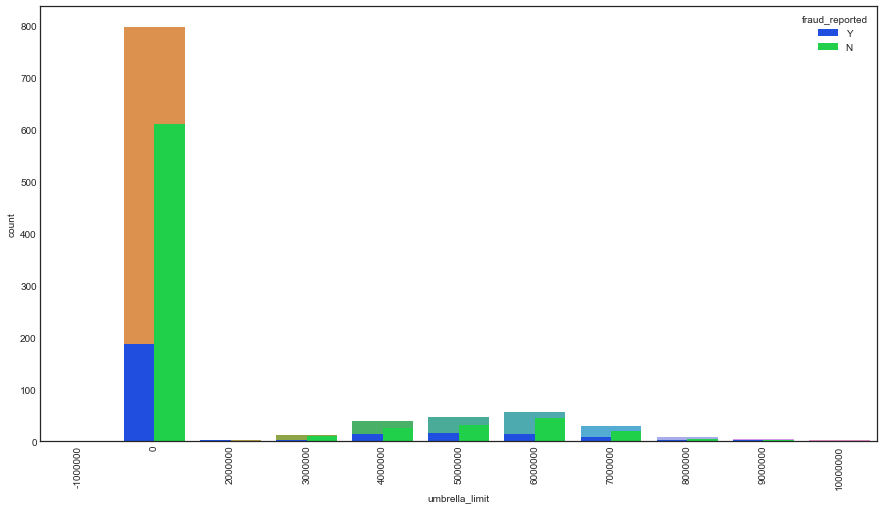

insured_occupation vs fraud_reported column ->


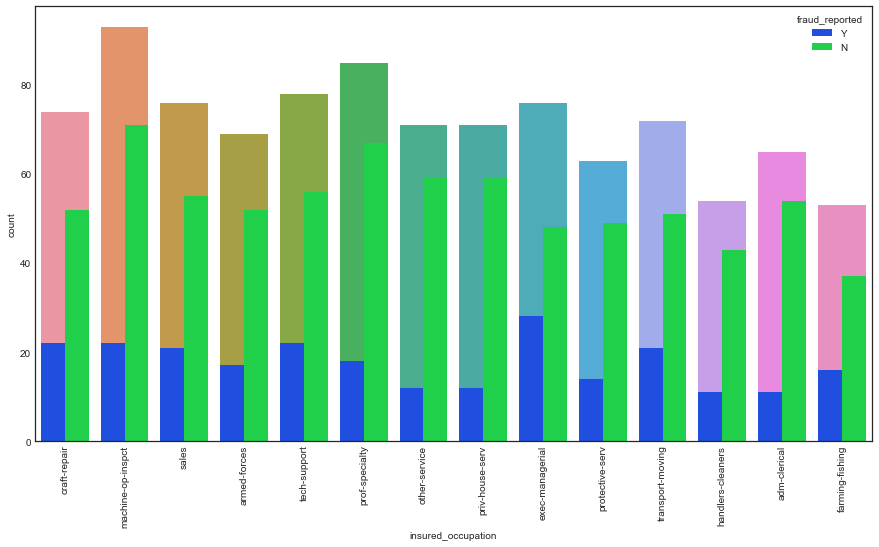

auto_make vs fraud_reported column ->


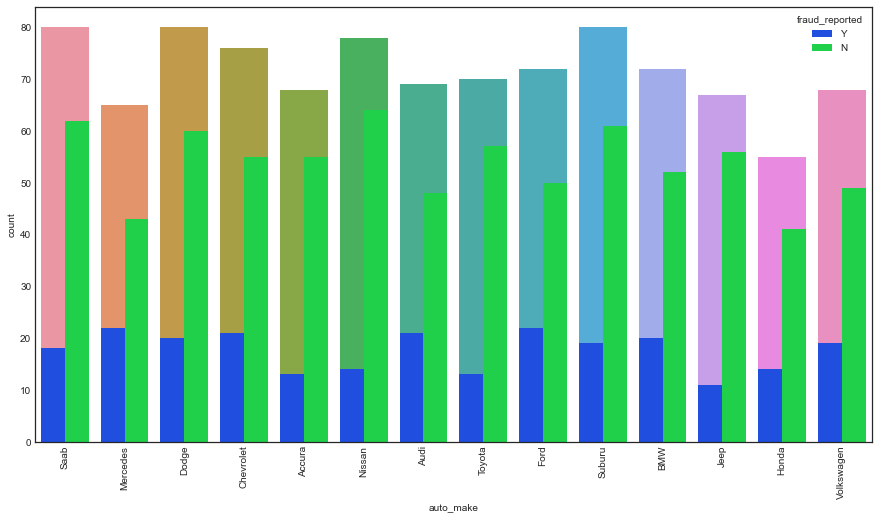

insured_hobbies vs fraud_reported column ->


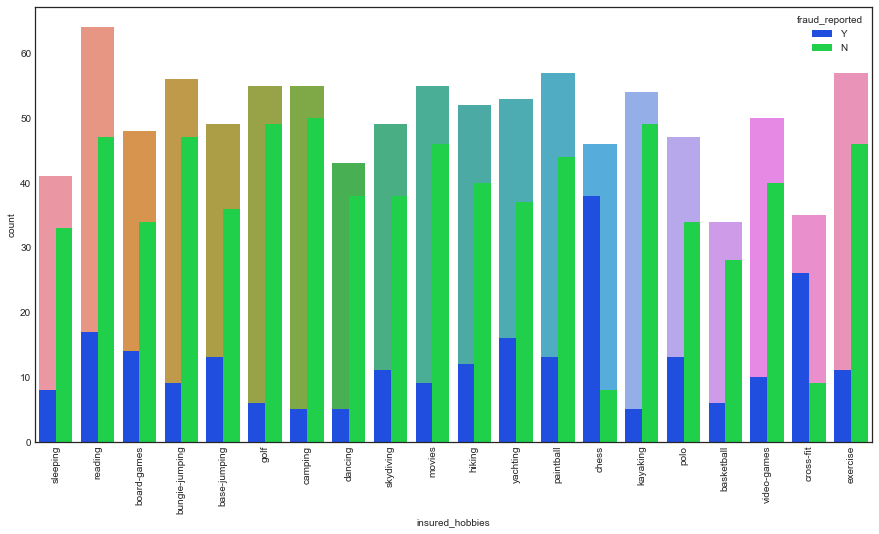

auto_model vs fraud_reported column ->


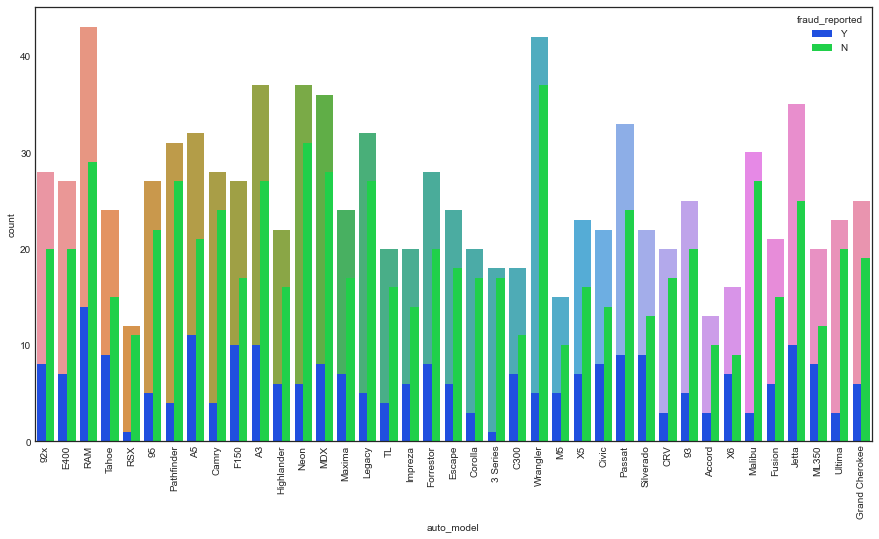

In [41]:
plt.style.use('seaborn-bright')

col1.remove("fraud_reported")

for k in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{k} vs fraud_reported column ->")
    sns.countplot(df[k])
    sns.countplot(df[k], hue=df['fraud_reported'])
    plt.show()
    
for l in df[col2]:
    plt.figure(figsize=(15,8))
    print(f"{l} vs fraud_reported column ->")
    sns.countplot(df[l])
    sns.countplot(df[l], hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

In the above countplots I have visualized all the feature columns with respect to our target variable.

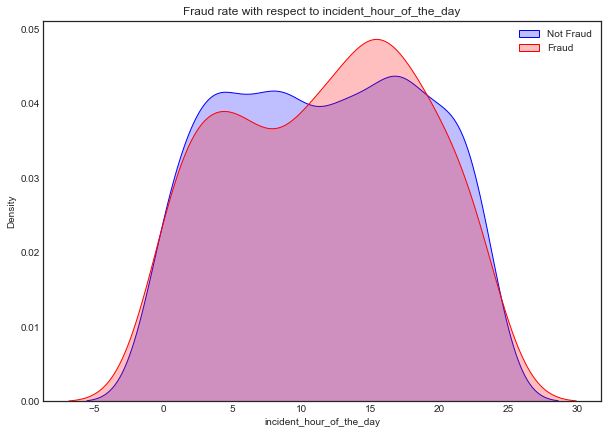

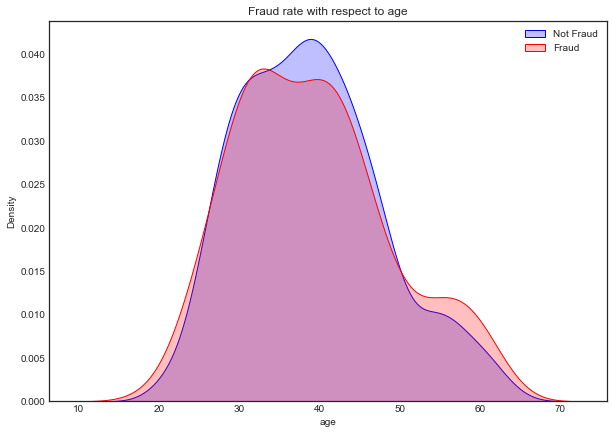

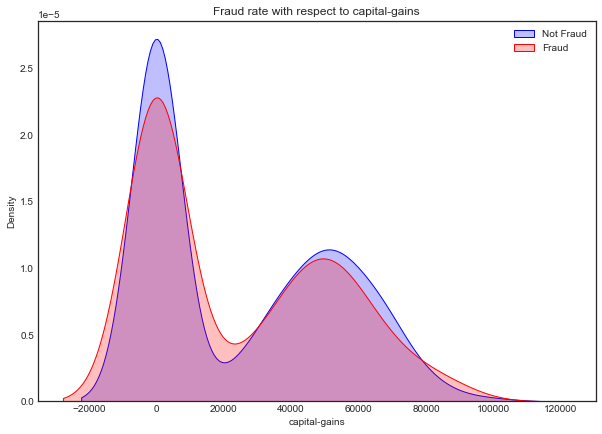

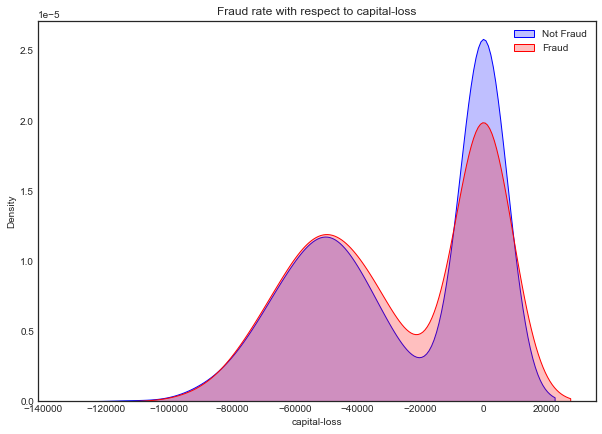

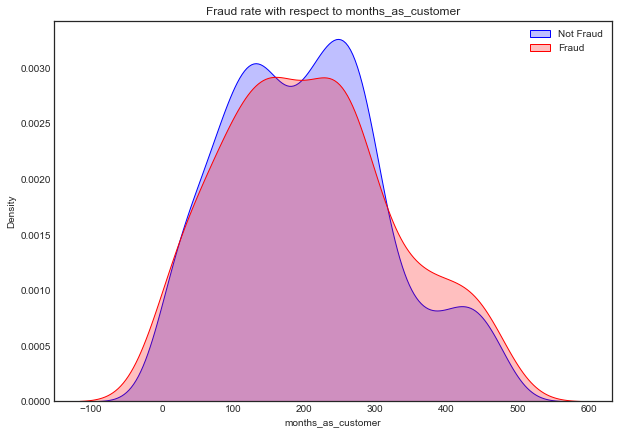

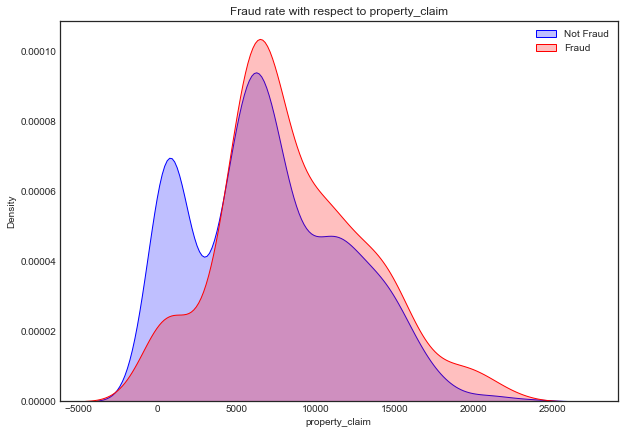

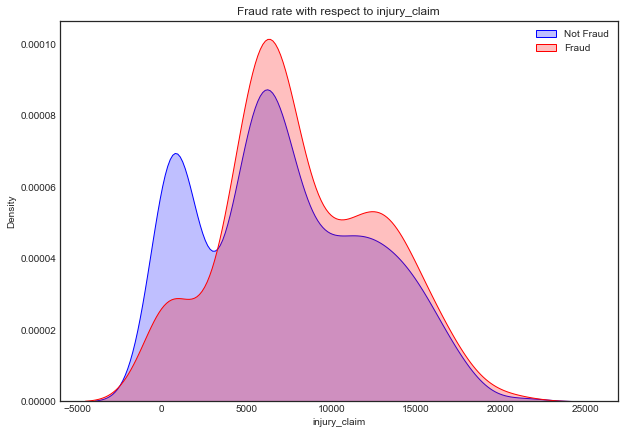

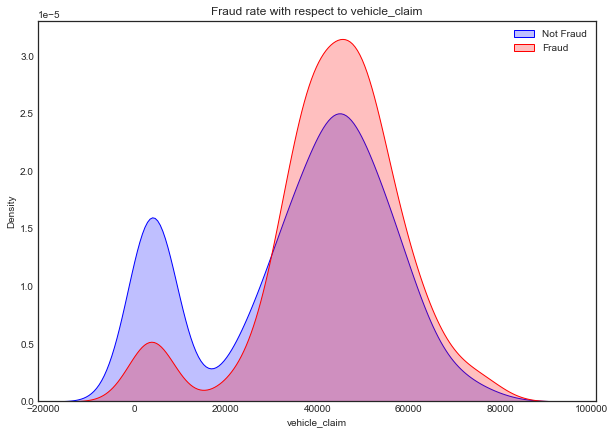

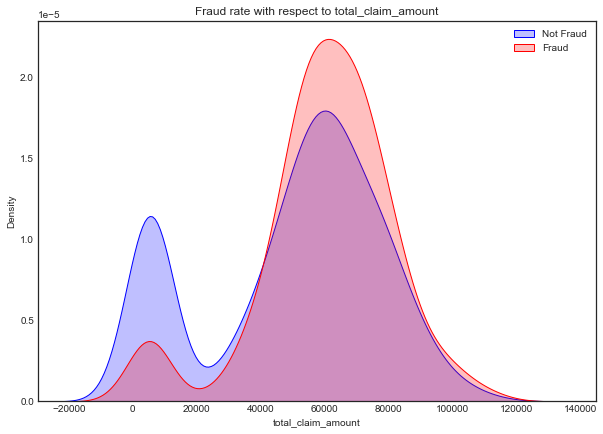

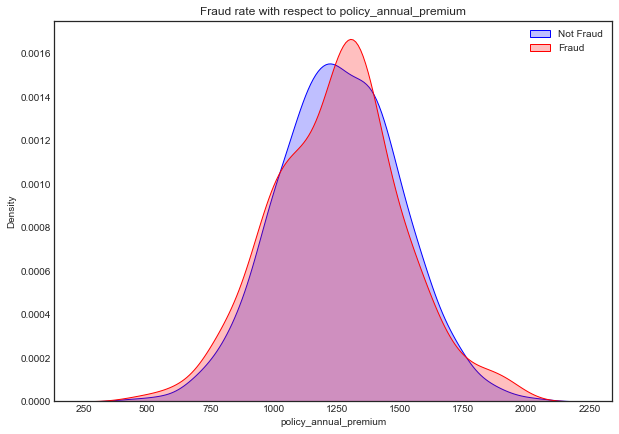

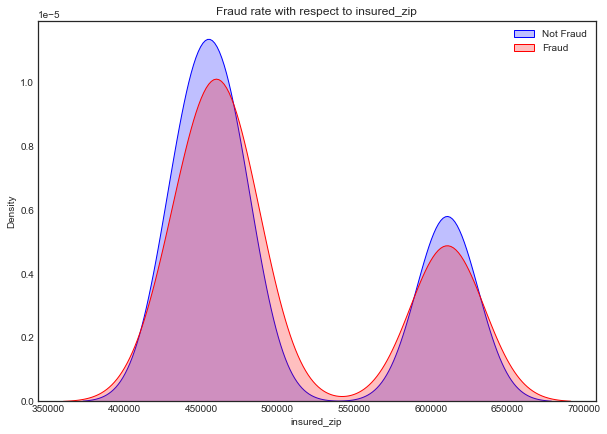

In [42]:
col3 = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

for z in df[col3]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),z], color='b', shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),z], color='r', shade=True, label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()

Covered visualization on all the columns with respect to our label column.

Label Column: fraud_reported(2)

Less category columns as col1: insured_sex(2) policy_state(3) policy_csl(3) policy_deductable(3) bodily_injuries(3) police_report_available(3) property_damage(3) incident_type(4) collision_type(4) incident_severity(4) number_of_vehicles_involved(4) witnesses(4) authorities_contacted(5) insured_relationship(6) insured_education_level(7) incident_state(7) incident_city(7)

More category columns as col2: umbrella_limit(11) insured_occupation(14) auto_make(14) insured_hobbies(20) auto_model(39)

High unique value numeric columns as col3: incident_hour_of_the_day(24) age(46) capital-gains(338) capital-loss(354) months_as_customer(391) property_claim(626) injury_claim(638) vehicle_claim(726) total_claim_amount(763) policy_annual_premium(991) insured_zip(995)

**getting list of all object data type column names**

In [43]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

object_datatype.remove('fraud_reported')
object_datatype

Object Data Type Columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

Here I have removed the label column from our categorical column list so that we can use label encoder on the target and ordinal encoder on the feature columns properly.

<font size=5>**Encoding the categorical object datatype columns**

<font size=4>**Label Encoder**

In [45]:
le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,questionable,Minor Damage,Police,VA,Riverwood,8,1,questionable,0,0,questionable,5070,780,780,3510,Mercedes,E400,2007,1,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,9,6,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,questionable,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,5,1990,1,10
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,questionable,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,6,2014,17,2


I have used LabelEncoder to convert the object datatype values present in our target label column into numerical format.

<font size=4>**Ordinal Encoder**

In [47]:
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, object_datatype)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,5,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1,17,10,2014,25,1
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,3.0,1.0,4.0,5.0,5.0,8,1,2.0,0,0,2.0,5070,780,780,3510,8.0,12.0,2007,1,27,6,2006,21,1
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,7,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0,9,6,2000,22,2
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,5,1,2.0,1,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1,25,5,1990,1,10
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,3.0,1.0,2.0,1.0,0.0,20,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0,6,6,2014,17,2


I have used OrdinalEncoder inside a function to loop through all the categorical data columns except our label and convert those feature values from object datatype to numerical datatype values.

In [48]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (1000, 40)


months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

With the help of shape and isnull method I am taking a look at our data frame values post applying the encoding technique on them. We see that there are no null values present in any of the columns above.

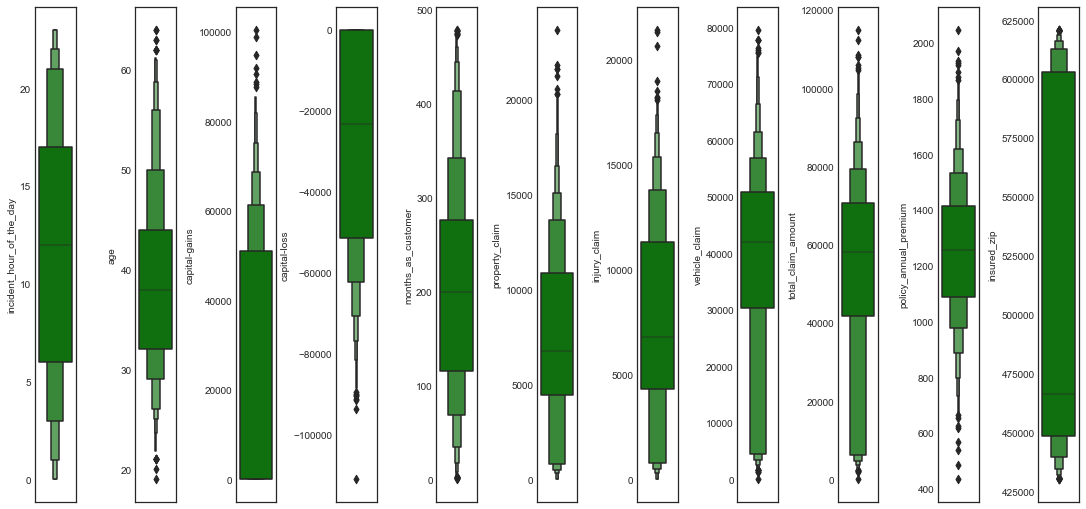

In [49]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="green")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of boxen plot we can see the outlier details present in our numerical data columns which will need to be treated.

In [50]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

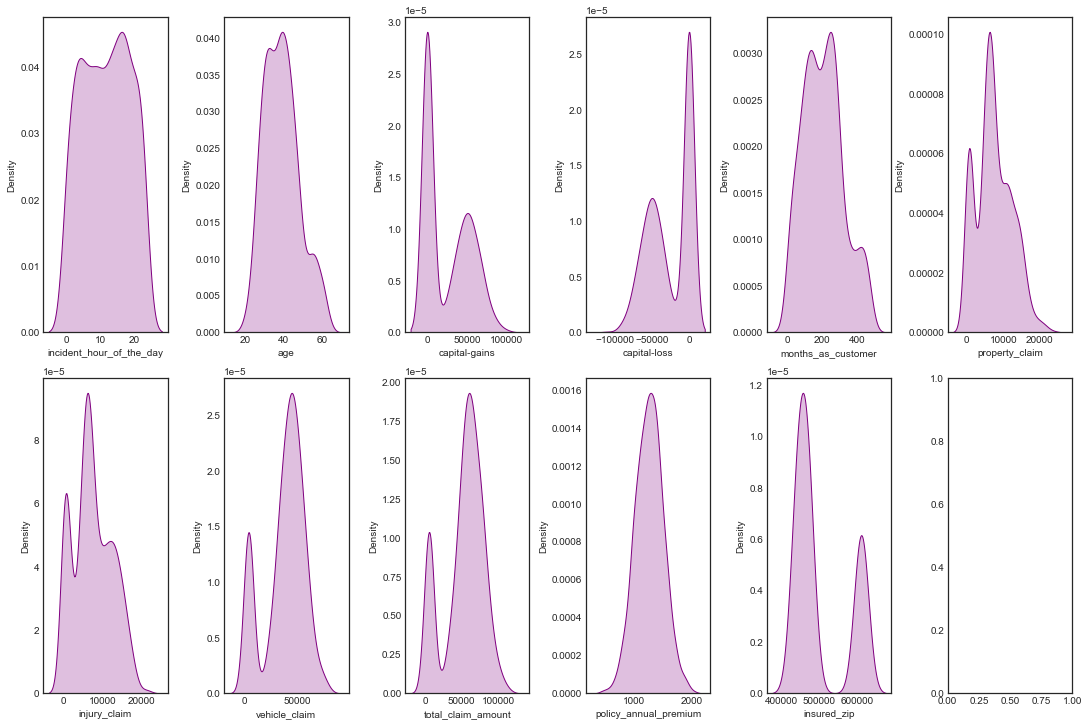

In [53]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.distplot(value, ax=ax[index], hist=False, color="purple", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of distribution plot we can see the skewness details present in our numerical data columns which will need to be treated.

<font size=5>**Using Z Score to remove outliers**

In [54]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


I have used the Z score method to remove the outliers and the percent of data lost is 2.0 which is way below the threshold of 10 percent that we could have afforded to lose.

<font size=5>**Using Log Transform to fix skewness**

In [55]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical datatype columns to ensure that we do not have skewness in our dataset.

<font size=5>**Correlation using a Heatmap**

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.<br>

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

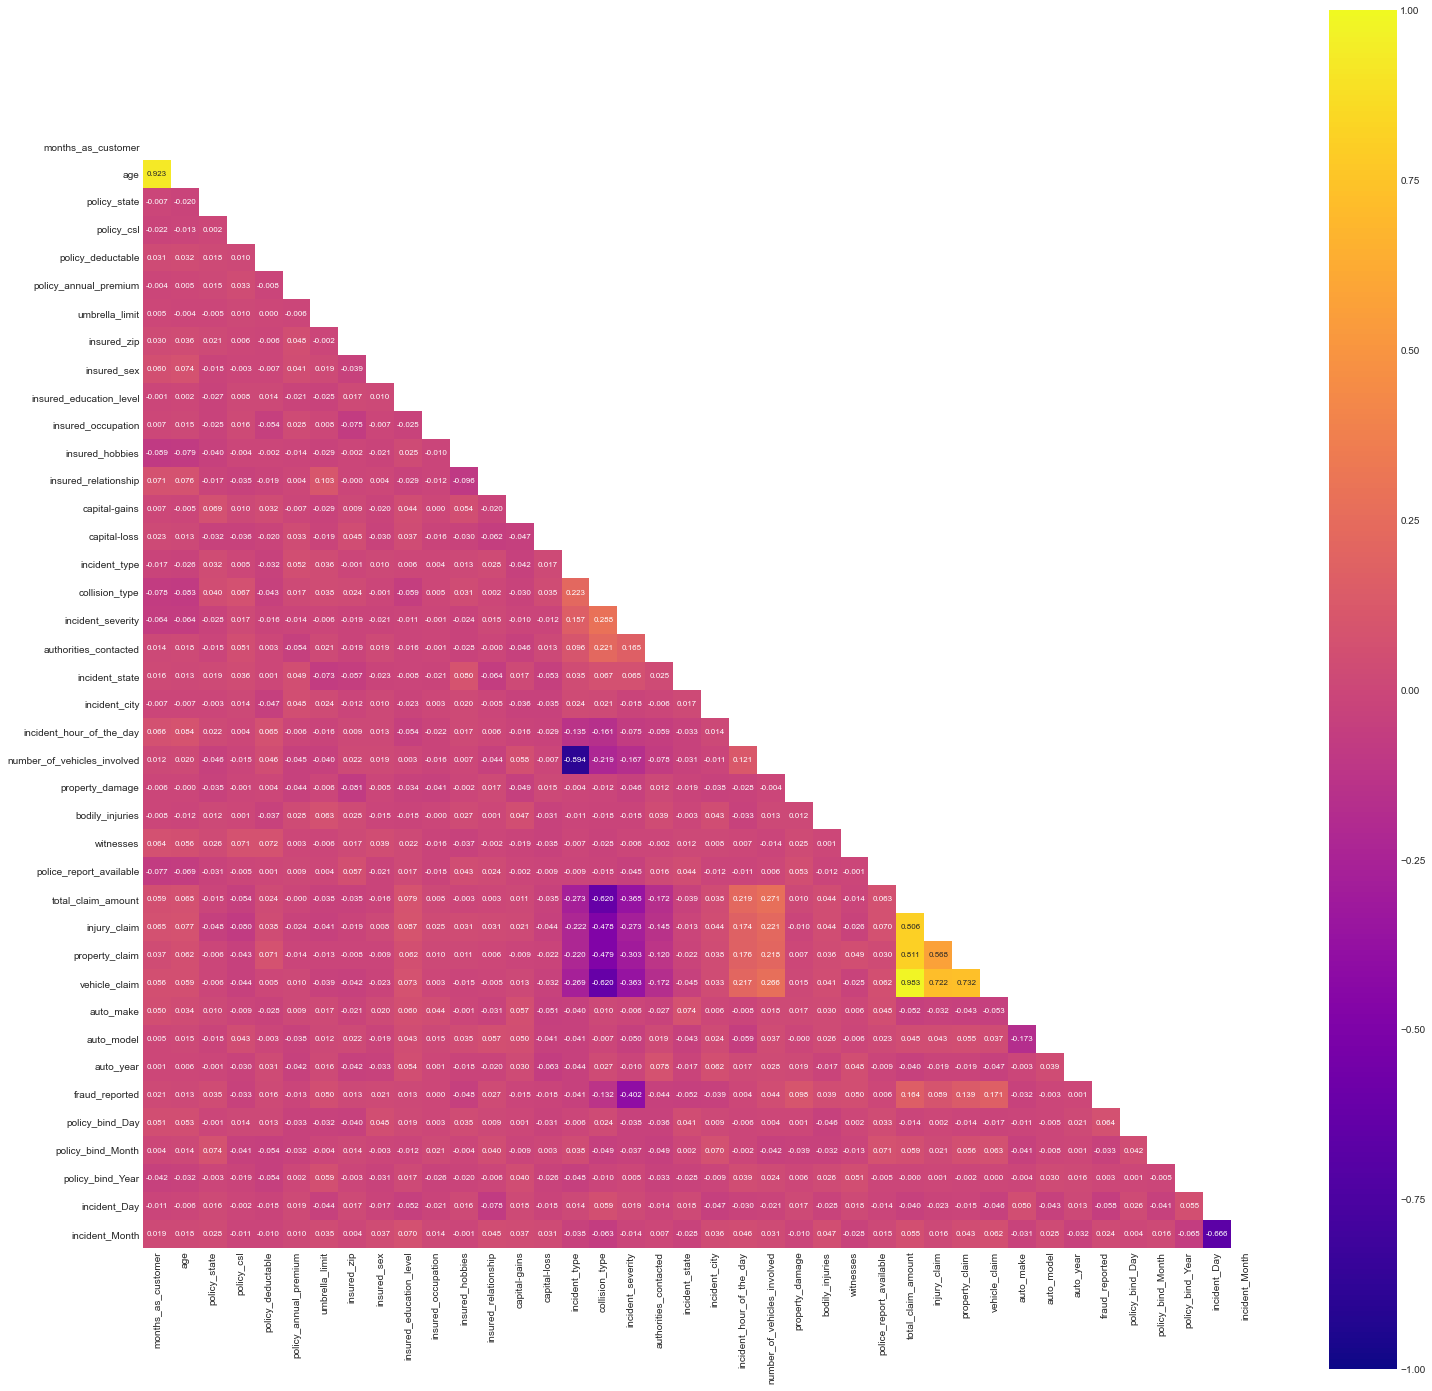

In [56]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the above heatmap we are not able to see the correlation details details but we can make out that there are few columns which are multicollinear. However they seem to add weightage over the label prediction therefore we shall retain them all.

<font size=5>**Correlation Bar Plot comparing features with our label**

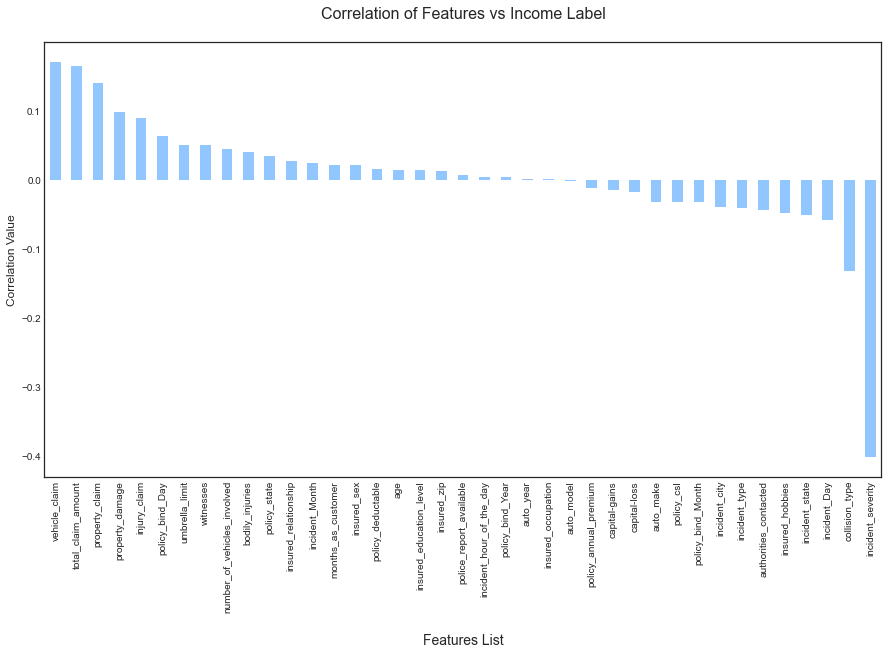

In [57]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.

In [58]:
df.dropna(inplace=True)

Making sure that there are no null values present in our dataframe.

<font size=5>**Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label**

In [59]:
X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

<font size=5>**Resolving the class imbalance issue in our label column**

In [60]:
Y.value_counts()

0    739
1    240
Name: fraud_reported, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates a huge class imbalance that we will have to fix by using the oversampling method.

**Adding samples to make all the categorical label values same**

In [64]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [65]:
Y.value_counts()

0    739
1    739
Name: fraud_reported, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

<font size=6>**Feature Scaling**

In [66]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,1.077998,1.015244,1.238268,0.096298,-0.260856,0.670550,-0.537574,-0.496613,1.104287,0.527788,-1.231609,1.401409,-1.540861,1.012177,0.985185,0.856006,0.738014,-1.051450,1.285557,0.417676,-0.972593,-0.983784,-0.836287,-0.095974,0.124425,0.582393,0.002571,0.674157,-0.252580,1.164805,0.706088,0.919106,-1.753901,-0.187901,0.166046,1.134367,1.827892,1.295625,-0.781705
1,0.178891,0.340039,-0.041421,0.096298,1.462158,-0.251656,2.140423,-0.462216,1.104287,0.527788,-0.173774,1.024113,-0.272095,-0.903427,0.985185,1.840739,1.762645,0.036961,1.285557,0.910526,1.094431,-0.531519,-0.836287,1.194050,-1.135161,-1.332571,1.293621,-2.035319,-1.482214,-1.505489,-2.060891,0.390845,-0.697046,0.346172,1.368475,-0.110552,0.665466,0.888019,-0.781705
2,-0.666270,-1.122905,1.238268,-1.227323,1.462158,0.697949,2.140423,-1.119343,-1.031690,1.621730,1.148521,-1.428313,0.362287,0.358068,0.985185,-1.113461,-0.286618,0.036961,1.285557,-1.060875,-0.972593,-0.682274,1.256909,-1.385998,1.384010,1.539874,-1.288480,-0.830836,0.002789,-0.835734,-0.944871,-0.665676,1.032353,0.346172,-0.795898,-0.110552,-0.206354,0.989920,-0.456435
3,0.430641,0.227505,-1.321111,0.096298,1.462158,0.709384,2.172076,1.593685,-1.031690,1.621730,-1.496068,-1.428313,0.996670,0.854041,-1.298060,0.856006,-1.311249,-1.051450,1.285557,-0.568025,-1.489349,-0.983784,-0.836287,1.194050,0.124425,0.582393,-1.288480,0.339850,-0.289061,-0.292512,0.628610,-0.929807,1.416664,1.592341,1.127990,-0.421782,-1.659388,-1.150012,2.145727
4,0.178891,0.565107,-1.321111,1.419920,-0.260856,1.448986,2.172076,1.627083,1.104287,-1.660094,1.148521,-1.428313,0.996670,1.468615,-0.697976,1.840739,1.762645,0.036961,-0.090107,-1.060875,-1.489349,1.277542,-0.836287,-1.385998,-1.135161,-0.375089,-1.288480,-1.977090,-1.370624,-1.533850,-2.001644,-1.722198,1.128431,0.702220,-1.156627,-0.110552,1.827892,0.480412,-0.456435


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

<font size=5>**Finding best random state for building our Classification Models**

In [67]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 81.35135135135135 on Random State 421


Great so with the help of random state selection process we have found our lucky number to be "421" amongst 1-1000 range.

<font size=6>**Feature importance bar graph**

In [69]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
incident_severity,0.186
insured_hobbies,0.044
collision_type,0.040
property_damage,0.039
policy_csl,0.037
vehicle_claim,0.035
incident_state,0.031
insured_zip,0.031
property_claim,0.030


Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

<font size=5>**Machine Learning Model for Classification with Evaluation Metr**

In [70]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=421)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

<font size=4>**Logistic Regression**

In [71]:
model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       199
           1       0.78      0.82      0.80       171

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370

Accuracy Score: 81.35135135135135
Cross Validation Score: 73.54947320201558

Accuracy Score - Cross Validation Score is 7.801878149335778


<font size=4>**Support Vector Classifier**

In [72]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       199
           1       0.88      0.85      0.87       171

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

Accuracy Score: 88.10810810810811
Cross Validation Score: 84.72056802565277

Accuracy Score - Cross Validation Score is 3.387540082455345


<font size=4>**Decision Tree Classifier** 

In [73]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       199
           1       0.83      0.84      0.83       171

    accuracy                           0.85       370
   macro avg       0.84      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

Accuracy Score: 84.5945945945946
Cross Validation Score: 83.02794319743472

Accuracy Score - Cross Validation Score is 1.5666513971598732


<font size=4>**Random Forest Classifier**

In [74]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       199
           1       0.91      0.85      0.88       171

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

Accuracy Score: 89.1891891891892
Cross Validation Score: 86.07375171781952

Accuracy Score - Cross Validation Score is 3.115437471369674


<font size=4>**K Neighbors Classifier**

In [75]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.18      0.30       199
           1       0.51      1.00      0.68       171

    accuracy                           0.56       370
   macro avg       0.76      0.59      0.49       370
weighted avg       0.77      0.56      0.47       370

Accuracy Score: 55.67567567567567
Cross Validation Score: 57.37723316536876

Accuracy Score - Cross Validation Score is -1.7015574896930872


<font size=4>**Extra Trees Classifier**

In [76]:
model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       199
           1       0.91      0.91      0.91       171

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370

Accuracy Score: 91.35135135135135
Cross Validation Score: 90.3307375171782

Accuracy Score - Cross Validation Score is 1.0206138341731474


<font size=4>**XGB Classifier**

In [77]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       199
           1       0.90      0.88      0.89       171

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

Accuracy Score: 90.0
Cross Validation Score: 87.69445716903344

Accuracy Score - Cross Validation Score is 2.3055428309665587


<font size=5>**Hyper parameter tuning on the best Classification ML Model**

<font size=4>**Choosing Extra Trees Classifier**

In [78]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model considering the accuracy score (being high) with the cross validation score against it and have listed down the chosen parameters above.

In [79]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [80]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [82]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 500,
 'n_jobs': -2,
 'random_state': 1000}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [83]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=500, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 88.91891891891892


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

<font size=6>**AUC ROC Curve**

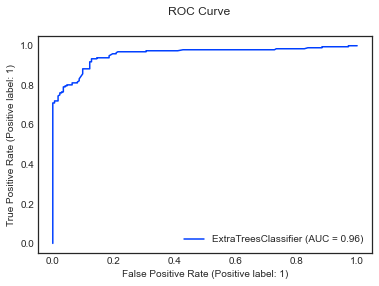

In [84]:
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 96%

<font size=6>**Confusion Matrix**

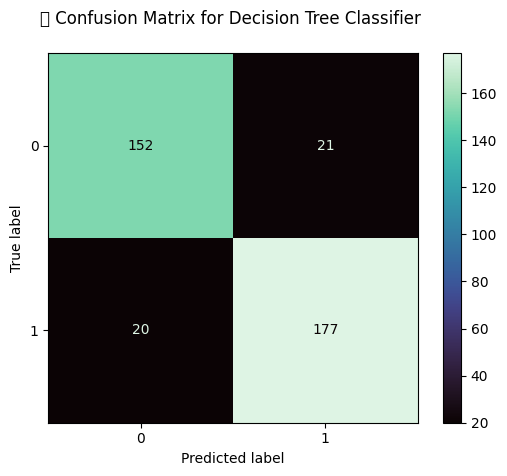

In [85]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

<font size=5>**Saving the Model**

In [86]:
filename = "FinalModel_E09.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E09.pkl']